# Statistical Power

### Introduction and Explanation

The power of a binary hypothesis test is the probability that the test correctly rejects the null hypothesis (H0) when the alternative hypothesis (H1) is true.  It can be thought of as the probability of accepting the alternative hypothesis when it is true - that is, the ability of a test to detect an effect if the effect actually exists.

The power of a test sometimes refers to the probability of rejecting the null hypothesis when it is not correct, though this is not the formal definition stated above.  The power in general is a function of the possible distributions, often determined by a parameter, under the alternative hypothesis.  A common scenario is the comparison of two data sets.  The power is then the probability of getting that data, X, given the means are different.  That is, one must clearly quantify how large a difference is relevant to the situation to state that the values are practically different.

As the power increases, there are decreasing chances of a Type II error (false negative) since the power is equal to 1-beta again, under the alternative hypothesis.  A similar concept is a Type I error, also referred to as the false positive rate, or the level of a test under the null hypothesis.

Power analysis can also be used to calculate the minimum sample size required so that one can be reasonably likely to detect an effect of a given size.  For example: 'How many times do I need to toss a coin to check if it is not a fair coin?'.  Power analysis can also be used to calculate the minimum effect size that is likely to be detected in a study using a given sample size. In addition, the concept of power is used to make comparisons between different statistical testing procedures: for example, between a parametric and a non-parametric test of the same hypothesis.

A somewhat different but similar concept is statistical sensitivity which measures how likely a given test gives the correct result (e.g. the likelihood that a test will determine if a patient has a particular disease correctly recognises the disease).

# Application

### A/B Testing

One common problem in A/B testing is to decide when to stop the experiment. Power calculations are very useful in determining the required minimum sample size necessary to reach a certain power (usually 80%), given an effect size and a significance level.

A powerful test would ensure we are able to detect differences in conversion the majority of the time given the difference in fact exists. To gain insights about the effect size, a small-scale pilot experiment is usually launched. The minimum sample size is computed. Subsequently, a full-scale experiment is run until the minimum sample size is reached.

In [1]:
import pandas as pd
import numpy as np
import scipy as scs
import matplotlib.pyplot as plt
import scipy.stats as scs
from itertools import combinations
%matplotlib inline

Continuing from yesterday's Etsy case study, get the conversion data for the new and old landing pages with the code below.

In [2]:
data = pd.read_csv('experiment.csv')
old_data = data[data['landing_page'] == 'old_page'] ['converted']
new_data = data[data['landing_page'] == 'new_page'] ['converted']

Historically, the old page has a conversion of 10% and we wish to test if the new page provides a 0.1% increase (1% lift) in conversion. Recall the null and alternative hypotheses below:

In [4]:
# Set X as a random variable which is the (new conversion - old conversion)
X ~ p_new - p_old
H0: \pi_new - \pi_old = 0.001 
H1: \pi_new - \pi_old > 0.001

SyntaxError: invalid syntax (<ipython-input-4-eecd744e43b2>, line 2)

In this part, we are going to compute statistical power for the pilot experiment given the null hypothesis `p_new ~ p_old` to be normal

1. By the CLT, we can approximate the sampling distribution of proportions (p_old ) to be normal

(since proportions are effectively a mean of 0's and 1's). We can further assume the sampling distribution `p_new - of p_old` to be normal.
p_new -
Compute p_old and the standard error from the sample and define a normal distribution random variable. Plot the PDF of the random variable as you have done previously.

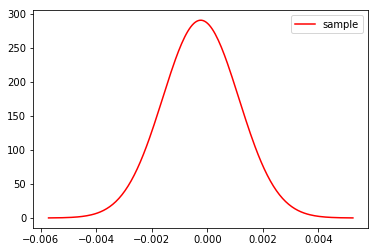

In [11]:
n_old = old_data.count()
n_new = new_data.count()
p_old = old_data.sum()/float(n_old)
p_new = new_data.sum()/float(n_new)
p = (n_old*p_old + p_new*n_new)/(n_old+n_new) 
se = np.sqrt(p*(1-p)/n_old + p*(1-p)/n_new) 
center = p_new-p_old
sample = scs.norm(loc=center,scale=se)
fig, ax = plt.subplots(1,1)
xvals2 = np.linspace(center-4*se,center+4*se,200) 
ax.plot(xvals2,sample.pdf(xvals2),color='r', label='sample') 
plt.legend()
plt.show()

Define another random variable for the null distribution and plot the PDF of the random variable. Add a vertical line on the plot to indicate the bound for rejecting the null hypothesis given a significance level of 5% (not shown in plot below).

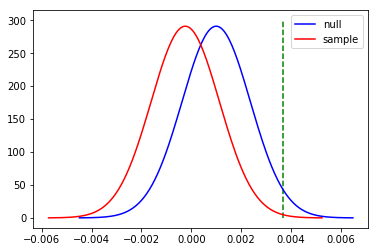

In [13]:
null = scs.norm(loc=0.001, scale=se) 
#here the loc keyword specifies the mean and scale the standard deviation

xvals = np.linspace(.001-4*se,.001+4*se,200) 
xvals2 = np.linspace(center-4*se,center+4*se,200)

fig, ax = plt.subplots(1,1) 
ax.plot(xvals,null.pdf(xvals),color='b', label='null') 
ax.plot(xvals2,sample.pdf(xvals2),color='r', label='sample')
alphahighval = null.ppf(0.975) 
ax.vlines(alphahighval,0,300,linestyle='--',color='g') 
plt.legend()
plt.show()

The probability of correctly identifying the alternative is true
if the true difference is as shown by the sample is 0.002.
This should seem strange because there is not a difference that suggests that we have an increase by the new.

beta = sample.cdf(alphahighval) print "Power is: ",1-beta

In [ ]:
data_se = np.std(data, ddof=1) / np.sqrt(len(data))